# Wind Power Plant Location Selection System

# Business Understanding 

The proposed project aims to develop a recommendation system to identify the best locations for setting up a wind power plant based on weather conditions. Wind energy is a promising renewable resource, but its efficiency and profitability depend on the wind patterns at specific locations. By leveraging historical weather data and geographical information, this recommendation system will help energy companies and policymakers make informed decisions about the optimal placement of wind power plants, maximizing energy generation and contributing to sustainable development.

## Problem Statement 
Selecting the most suitable locations for wind power plants is critical for maximizing energy generation and ensuring a sustainable and profitable operation. However, the efficiency of wind energy production relies heavily on the prevailing weather conditions in specific areas. The lack of a comprehensive and data-driven approach to assess the wind energy potential at different locations hinders effective decision-making for energy companies and policymakers.

This project aims to address this challenge by developing a recommendation system that utilizes historical weather data and geographical information to rank potential wind power plant locations. The system will consider factors such as wind speed, direction, temperature, humidity, and other relevant weather parameters to identify the regions with the highest wind energy potential. By providing accurate and data-driven location recommendations, this project seeks to empower stakeholders in the renewable energy sector to make informed choices, optimize wind power generation, and contribute to sustainable energy development.

The motivation behind this project stems from the urgent need to transition to renewable energy sources and mitigate the adverse effects of climate change caused by the burning of fossil fuels. By facilitating the efficient deployment of wind power plants in areas with optimal wind conditions, the recommendation system can have a positive impact on the global energy crisis and foster a greener and more sustainable future.

## Project Objectives 
* Develop a predictive model: Create a robust predictive model capable of estimating the energy output of a wind farm  based on historical wind data and surrounding wind conditions on an Hourly basis.
* Build a system for wind power plant locations: Build an application to recommend the best locations for setting up a wind power plant based on weather conditions.
* Build a system: Build an application to recommend the Power Grid to suggest the best time to utilize the energy from wind farms.
* Optimize wind energy generation: Enable decision-makers to optimize wind energy generation by providing accurate predictions, facilitating efficient resource planning and utilization of wind power.


FIRST DATASET

In [210]:
# importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [211]:
#Initialize the DataUnderstanding class
class DataUnderstanding:
    def __init__(self, df):
        self.df = df
# Get the summary statistics
    def get_summary_statistics(self):
        summary_stats = self.df.describe()
        return summary_stats
#Get the count of missing values
    def get_missing_values(self):
        missing_values = self.df.isnull().sum()
        return missing_values
#Get the summary of the DataFrame   
    def get_info(self):
        info = self.df.info()
        return info
# Get the data types
    def get_dtypes(self):
        dtypes = self.df.dtypes
        return dtypes  
# Check the count of unique values for each column (excluding the time data)
    def get_unique_values(self):
        unique_values = self.df.iloc[:, 0:6].nunique()
        return unique_values
    
# Convert the 'Date' column to a datetime data type
    def convert_to_datetime(self, column):
        self.df[column] = pd.to_datetime(self.df[column]) 

# Set the specified column as the index
    def set_index(self, column):
        self.df.set_index(column, inplace=True)

# Sort the data based on the index (date) if necessary
    def sort_data(self):
        self.df.sort_index(inplace=True)

In [212]:
data = pd.read_csv('data.csv')

In [213]:
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [214]:
# Rename Date/Time column to DateTime
data.rename(columns={'Date/Time': 'DateTime'}, inplace=True)


In [215]:
data['DateTime'] = pd.to_datetime(data['DateTime'],format='%d %m %Y %H:%M')

In [216]:
du = DataUnderstanding(data)

In [217]:
# Get info about the dataset
du.get_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   DateTime                       50530 non-null  datetime64[ns]
 1   LV ActivePower (kW)            50530 non-null  float64       
 2   Wind Speed (m/s)               50530 non-null  float64       
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64       
 4   Wind Direction (°)             50530 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.9 MB


In [218]:
# Rename Date/Time column to DateTime
data.rename(columns={'Date/Time': 'DateTime'}, inplace=True)


In [219]:
# checking for missing values
du.get_missing_values()

DateTime                         0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

In [220]:
# Check the count of unique values for each column (excluding the time data)
unique_values = du.get_unique_values()
print("Unique Values:")
print(unique_values)

Unique Values:
DateTime                         50530
LV ActivePower (kW)              38764
Wind Speed (m/s)                 50305
Theoretical_Power_Curve (KWh)    37157
Wind Direction (°)               50251
dtype: int64


In [221]:
# make DateTime the index
du.set_index('DateTime')

In [222]:
# Get the summary statistics
summary_stats = du.get_summary_statistics()
print("Summary Statistics:")
summary_stats

Summary Statistics:


,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [223]:
# power loss 
data['Power Loss'] = data['Theoretical_Power_Curve (KWh)'] - data['LV ActivePower (kW)']
data.head()


,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Power Loss
DateTime,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,36.281117
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,66.148316
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,84.523429
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,96.481664
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,111.052276


# Exploratory Data Analysis

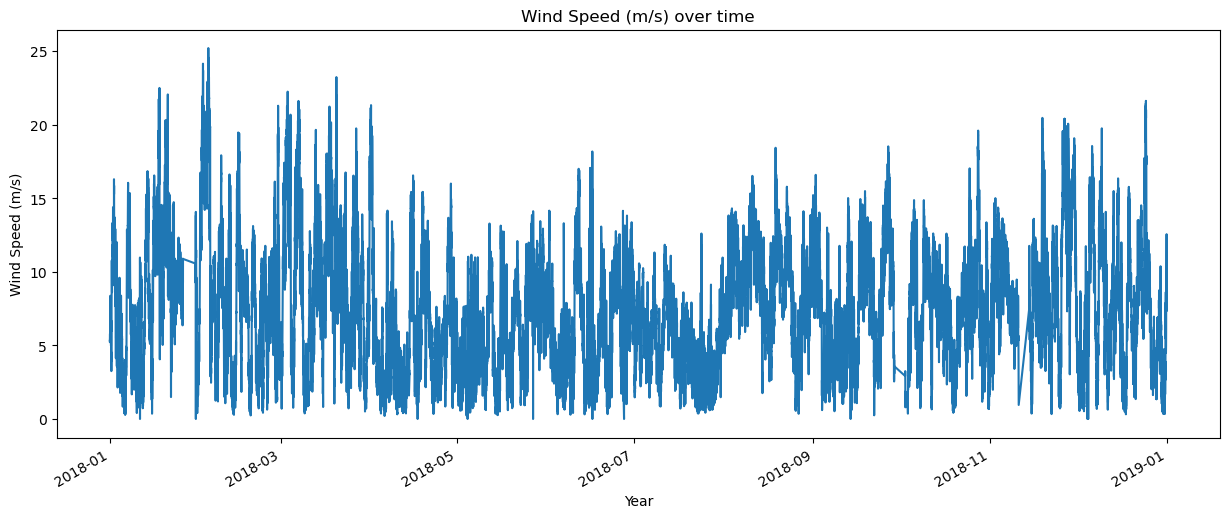

In [224]:
data['Wind Speed (m/s)'].plot(figsize=(15, 6))
plt.title('Wind Speed (m/s) over time')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Year')
plt.show()

* Due to Random Noise in the Data, we will resample the data to 1 hour, daily, weekly and Monthly frequencies.

In [225]:
hourly = data.resample('H').mean()
daily = data.resample('D').mean()
weekly = data.resample('W').mean()
monthly = data.resample('M').mean()

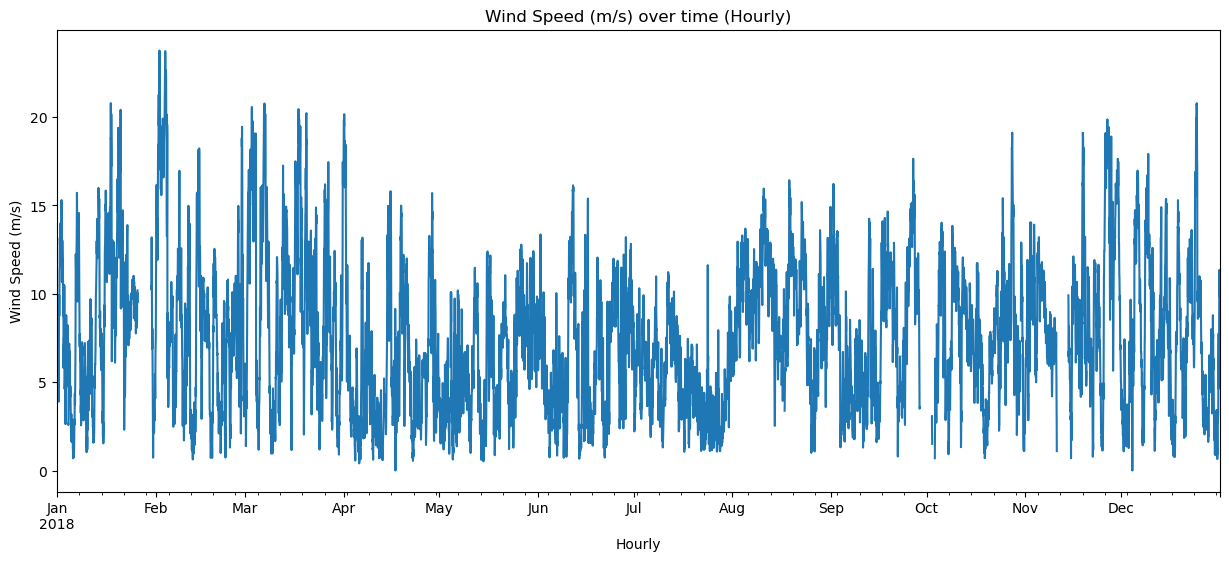

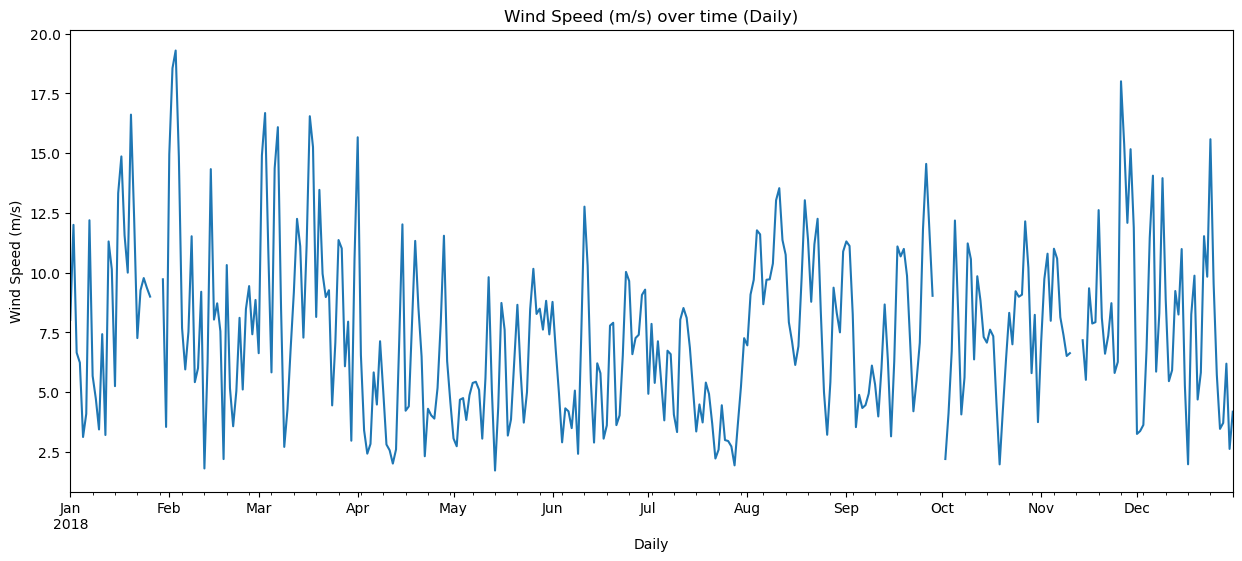

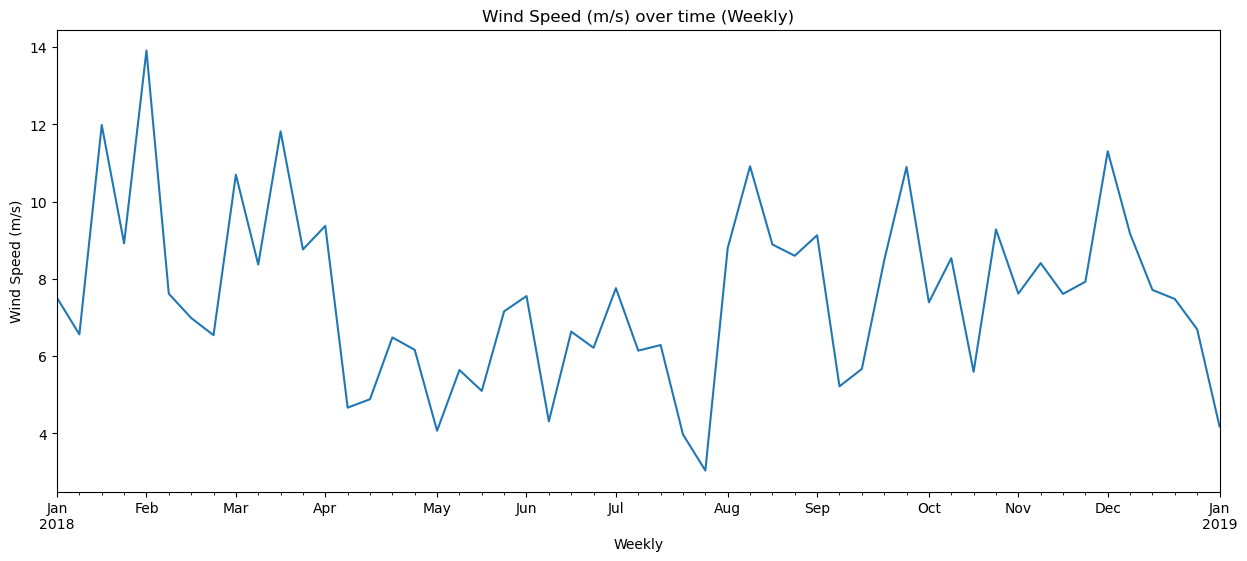

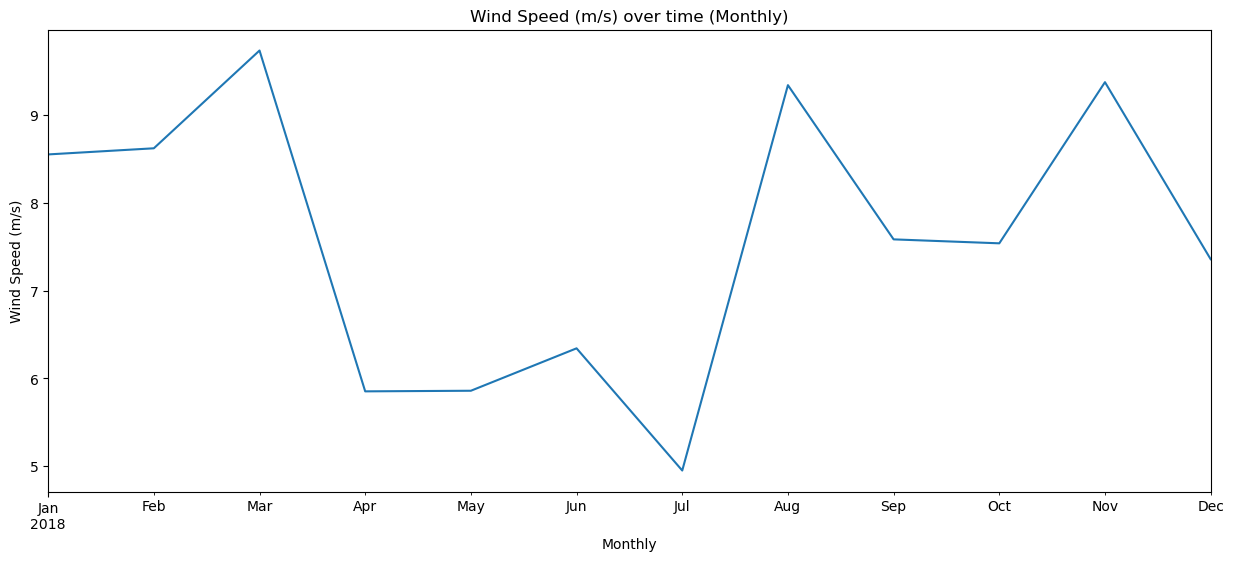

In [226]:

# Resample the DataFrame using the index
time_intervals = ['Hourly', 'Daily', 'Weekly', 'Monthly']
data_resampled = [data.resample('H').mean(), data.resample('D').mean(), data.resample('W').mean(), data.resample('M').mean()]

# Plot 'Wind Speed (m/s)' over time for each time interval using a for loop
for i in range(len(time_intervals)):
    plt.figure(figsize=(15, 6))
    data_resampled[i]['Wind Speed (m/s)'].plot()
    plt.title(f'Wind Speed (m/s) over time ({time_intervals[i]})')
    plt.ylabel('Wind Speed (m/s)')
    plt.xlabel(time_intervals[i])
    plt.show()

In [227]:
# PLot power loss over time
data['Power LOss'].plot(figsize=(15, 6))
plt.title('Power Loss over time')
plt.ylabel('Power Loss')
plt.xlabel('Year')
plt.show()

KeyError: 'Power LOss'

In [ ]:
data.head()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Power LOss,Power Loss
DateTime,,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,36.281117,36.281117
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,66.148316,66.148316
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,84.523429,84.523429
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,96.481664,96.481664
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,111.052276,111.052276


OptionError: "No such keys(s): 'mode.use_inf_as_null'"

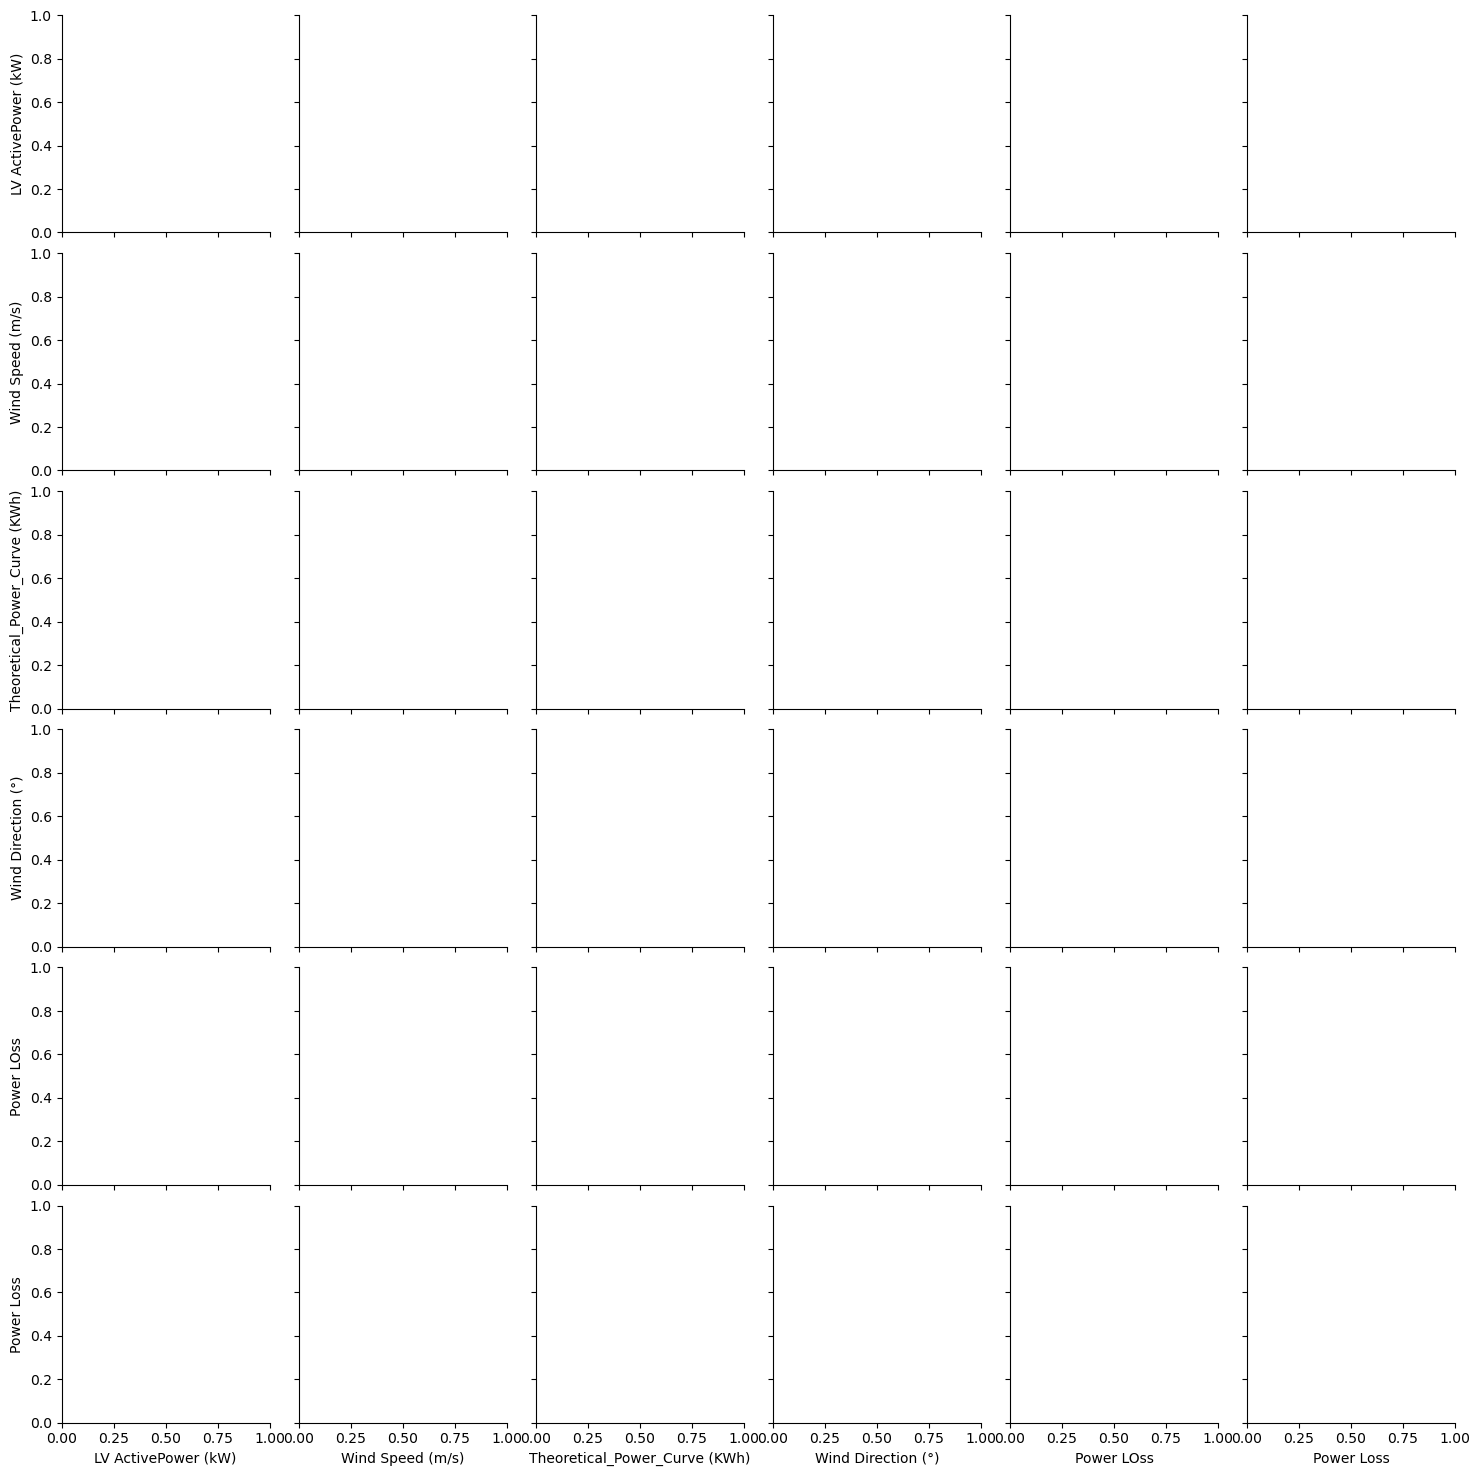

In [ ]:
sns.pairplot(data)

plt.show()

# Bi-Variate Analysis

In [ ]:
# Function for Bivariate Analysis

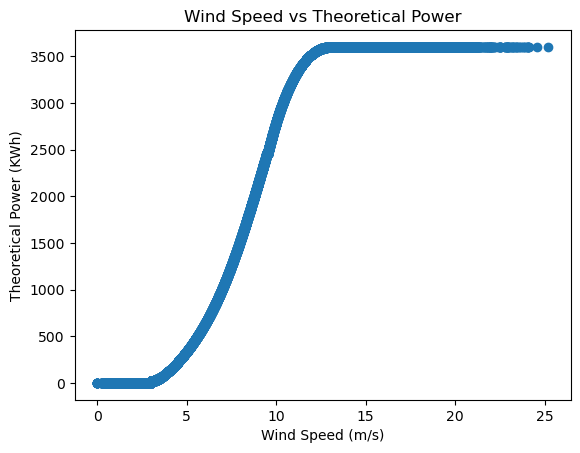

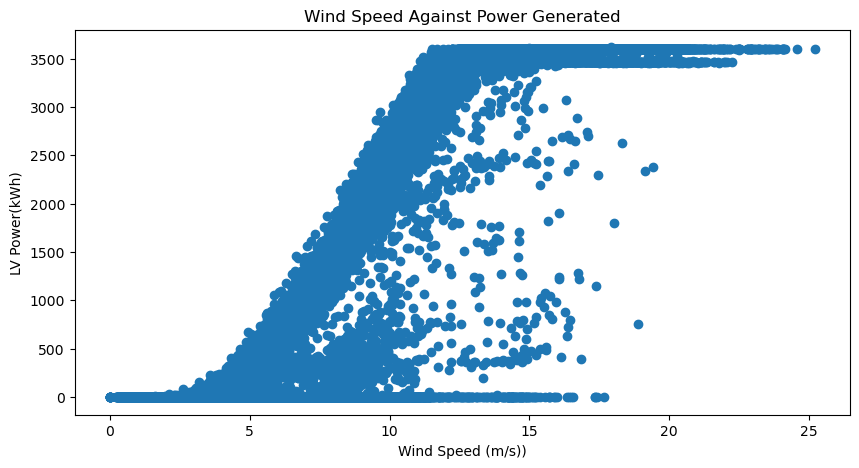

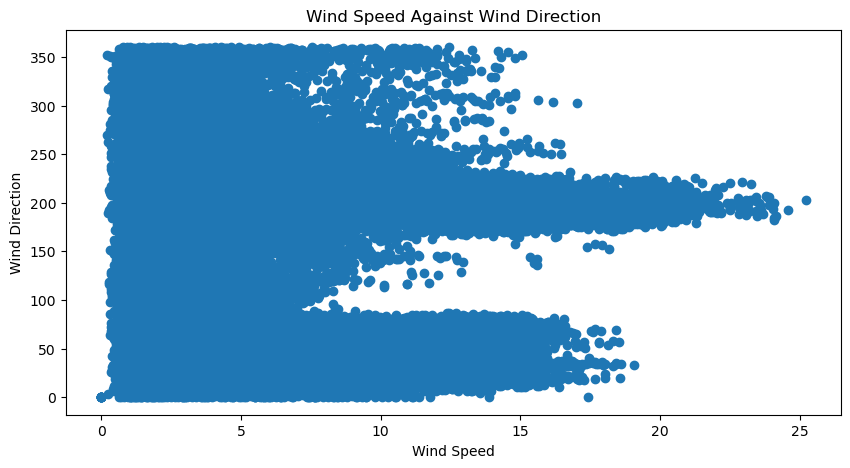

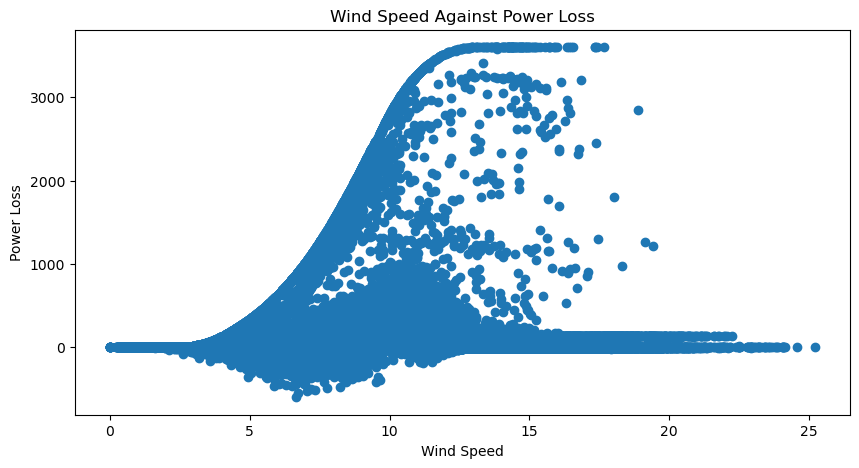

In [232]:
# Plot wind speed vs theoretical power
plt.scatter(data['Wind Speed (m/s)'], data['Theoretical_Power_Curve (KWh)'])
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Theoretical Power (KWh)')
plt.title('Wind Speed vs Theoretical Power')
plt.show()

# Plot wind speed vs LV power
plt.figure(figsize=(10,5))
plt.scatter(data['Wind Speed (m/s)'],data['LV ActivePower (kW)'])
plt.xlabel('Wind Speed (m/s))')
plt.ylabel('LV Power(kWh)')
plt.title('Wind Speed Against Power Generated')
plt.show()

# Plot wind speed vs wind direction
plt.figure(figsize=(10,5))
plt.scatter(data['Wind Speed (m/s)'],data['Wind Direction (°)'])
plt.xlabel('Wind Speed')
plt.ylabel('Wind Direction')
plt.title('Wind Speed Against Wind Direction')
plt.show()  

# Plot wind speed vs power loss
plt.figure(figsize=(10,5))
plt.scatter(data['Wind Speed (m/s)'],data['Power Loss'])
plt.xlabel('Wind Speed')
plt.ylabel('Power Loss')
plt.title('Wind Speed Against Power Loss')
plt.show()


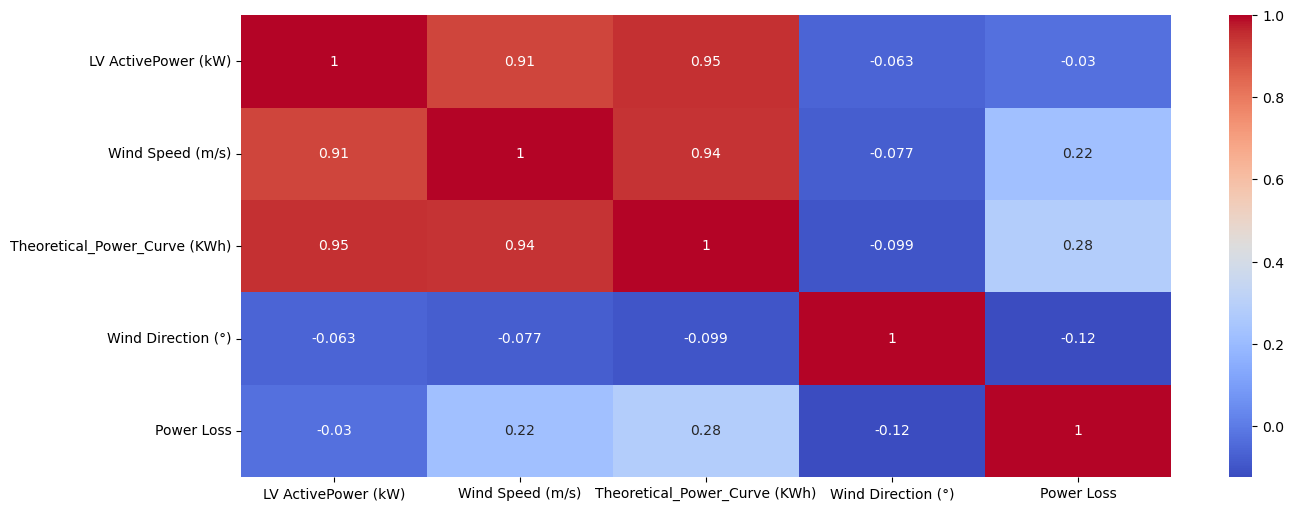

In [228]:
# Plot the correlation heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [235]:
# Drop the columns and keep 'LV ActivePower (kW)' and 'Wind Speed (m/s)'
data_subset = data.drop(['Theoretical_Power_Curve (KWh)', 'Wind Direction (°)','Power Loss'], axis=1)

In [236]:
data_subset.head()

,LV ActivePower (kW),Wind Speed (m/s)
DateTime,,
2018-01-01 00:00:00,380.047791,5.311336
2018-01-01 00:10:00,453.769196,5.672167
2018-01-01 00:20:00,306.376587,5.216037
2018-01-01 00:30:00,419.645905,5.659674
2018-01-01 00:40:00,380.650696,5.577941


# SECOND DATASET

In [241]:
df_2 = pd.read_csv('/home/bravin/Documents/Moringa School Capstone Project/Capstone Project/Dataset/combined_file.csv')

/tmp/ipykernel_8066/1677672789.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2 = pd.read_csv('/home/bravin/Documents/Moringa School Capstone Project/Capstone Project/Dataset/combined_file.csv')


In [242]:
df_2.head()

,YEAR,MO,DY,HR,WS50M,Location,Latitude,Longitude,Unnamed: 8,Unnamed: 9
0,2013,1,1,2,5.25,Kajiado,-1.8313,36.7987,NaN,NaN
1,2013,1,1,3,4.96,Kajiado,-1.8313,36.7987,NaN,NaN
2,2013,1,1,4,4.77,Kajiado,-1.8313,36.7987,NaN,NaN
3,2013,1,1,5,4.64,Kajiado,-1.8313,36.7987,NaN,NaN
4,2013,1,1,6,4.55,Kajiado,-1.8313,36.7987,NaN,NaN
